<center>
    <h1 style="color:blue;">🏏 India vs Pakistan T20 Winner Predictor</h1>
</center>

Predict the winner of India vs Pakistan T20 matches using a **Machine Learning model** with an **interactive Gradio dashboard**. This notebook is beginner-friendly and shows how to build an ML model and make it interactive.



## Features

- **Single Match Prediction**  
  Enter India runs, Pakistan runs, toss winner, and pitch condition to predict the winner instantly.  
  Winner is **color-coded**:  
  - 🟢 India  
  - 🔵 Pakistan  
  Run difference is also displayed.  

- **Batch Prediction (CSV Upload)**  
  Upload a CSV with multiple matches to predict winners for all matches at once.  
  Download a CSV with a new **`predicted_winner`** column.

- **Automatic Categorical Handling**  
  Toss and pitch inputs are selected by **name** (India/Pakistan, Dry/Wet/Normal).  
  Encoding is handled internally — no manual work needed.

- **Interactive Dashboard**  
  Built using **Gradio**, works inline in Kaggle notebooks with a shareable link.

---

This notebook is perfect for **sports analytics enthusiasts** who want a **hands-on ML project** with a clean and interactive UI.


# this data set working in prediction 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# machine learning library 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
print(os.listdir("/kaggle/input"))

['india-vs-pakistan-t20-matches']


In [4]:
import os
print(os.listdir("/kaggle/input/india-vs-pakistan-t20-matches"))


['India Vs Pakistan.xlsx', 'asdsadsd-1.jpg']


In [5]:

df = pd.read_excel("/kaggle/input/india-vs-pakistan-t20-matches/India Vs Pakistan.xlsx")

In [6]:
df.head()

,match_id,year,venue,tournament,india_runs,pak_runs,toss_winner,bat_first,india_wickets,pak_wickets,winner,pitch_condition
0,1,2021,New York,WorldCup,166,184,Pakistan,Pakistan,2,7,Pakistan,Batting-friendly
1,2,2010,New York,AsiaCup,179,156,Pakistan,Pakistan,6,7,India,Bowler-friendly
2,3,2020,Lahore,AsiaCup,126,146,Pakistan,Pakistan,2,5,Pakistan,Bowler-friendly
3,4,2010,New York,AsiaCup,181,104,Pakistan,Pakistan,3,4,India,Balanced
4,5,2012,Kolkata,AsiaCup,170,182,Pakistan,India,3,10,Pakistan,Balanced


In [7]:
df.tail()

,match_id,year,venue,tournament,india_runs,pak_runs,toss_winner,bat_first,india_wickets,pak_wickets,winner,pitch_condition
996,997,2012,Kolkata,AsiaCup,173,177,India,Pakistan,3,8,Pakistan,Bowler-friendly
997,998,2008,Durban,Bilateral,124,200,Pakistan,Pakistan,1,9,Pakistan,Bowler-friendly
998,999,2017,New York,WorldCup,198,103,India,Pakistan,2,5,India,Batting-friendly
999,1000,2020,Lahore,WorldCup,196,197,Pakistan,India,9,4,Pakistan,Batting-friendly
1000,1001,2024,New York,WorldCup,119,113,Pakistan,India,8,7,India,Bowler-friendly


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   match_id         1001 non-null   int64 
 1   year             1001 non-null   int64 
 2   venue            1001 non-null   object
 3   tournament       1001 non-null   object
 4   india_runs       1001 non-null   int64 
 5   pak_runs         1001 non-null   int64 
 6   toss_winner      1001 non-null   object
 7   bat_first        1001 non-null   object
 8   india_wickets    1001 non-null   int64 
 9   pak_wickets      1001 non-null   int64 
 10  winner           1001 non-null   object
 11  pitch_condition  1001 non-null   object
dtypes: int64(6), object(6)
memory usage: 94.0+ KB


In [9]:
df.shape

(1001, 12)

In [10]:
df.describe()

,match_id,year,india_runs,pak_runs,india_wickets,pak_wickets
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,501.000000,2015.379620,151.407592,149.049950,5.121878,4.898102
std,289.108111,5.193818,28.707520,29.605228,3.182630,3.165376
min,1.000000,2007.000000,100.000000,100.000000,0.000000,0.000000
25%,251.000000,2011.000000,128.000000,122.000000,2.000000,2.000000
50%,501.000000,2015.000000,152.000000,148.000000,5.000000,5.000000
75%,751.000000,2020.000000,176.000000,175.000000,8.000000,8.000000
max,1001.000000,2024.000000,200.000000,200.000000,10.000000,10.000000


In [11]:
df.isnull().sum()

match_id           0
year               0
venue              0
tournament         0
india_runs         0
pak_runs           0
toss_winner        0
bat_first          0
india_wickets      0
pak_wickets        0
winner             0
pitch_condition    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
print("\nWinner Count:\n", df['winner'].value_counts())


Winner Count:
 winner
India       532
Pakistan    469
Name: count, dtype: int64


In [14]:
print("\nTournament Count:\n", df['tournament'].value_counts())


Tournament Count:
 tournament
AsiaCup      346
WorldCup     337
Bilateral    318
Name: count, dtype: int64


In [15]:
print("\nTop 10 Venues:\n", df['venue'].value_counts().head(10))


Top 10 Venues:
 venue
Dubai        116
Durban       111
Karachi      104
Melbourne    104
Colombo      101
Delhi         99
New York      95
Kolkata       95
Lahore        94
Dhaka         82
Name: count, dtype: int64


# 3 Visualization

In [16]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

## 3.1 Runs comparison (India vs Pakistan)

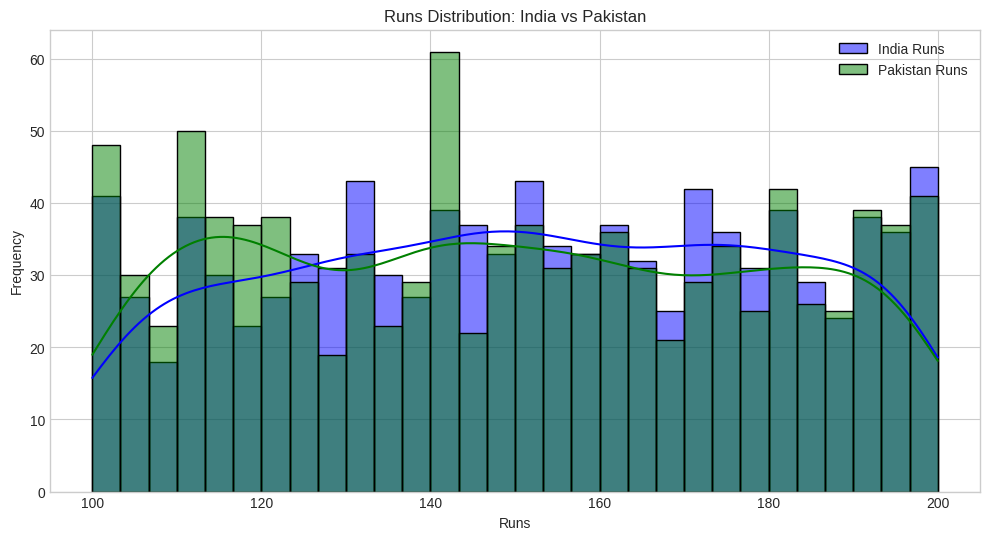

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(df['india_runs'], color='blue', label='India Runs', kde=True, bins=30)
sns.histplot(df['pak_runs'], color='green', label='Pakistan Runs', kde=True, bins=30)
plt.legend()
plt.title("Runs Distribution: India vs Pakistan")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

## 3.2 Toss vs Match Winner relation

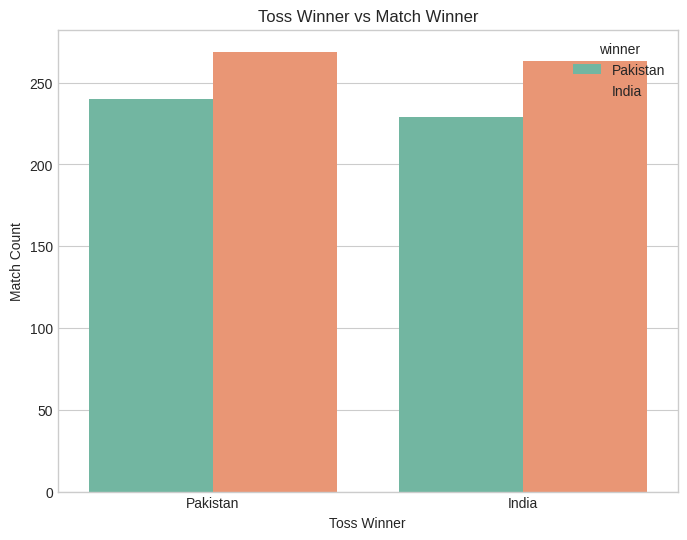

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="toss_winner", hue="winner", palette="Set2")
plt.title("Toss Winner vs Match Winner")
plt.xlabel("Toss Winner")
plt.ylabel("Match Count")
plt.show()

## 3.3 Effect of Pitch Condition on Match Outcome

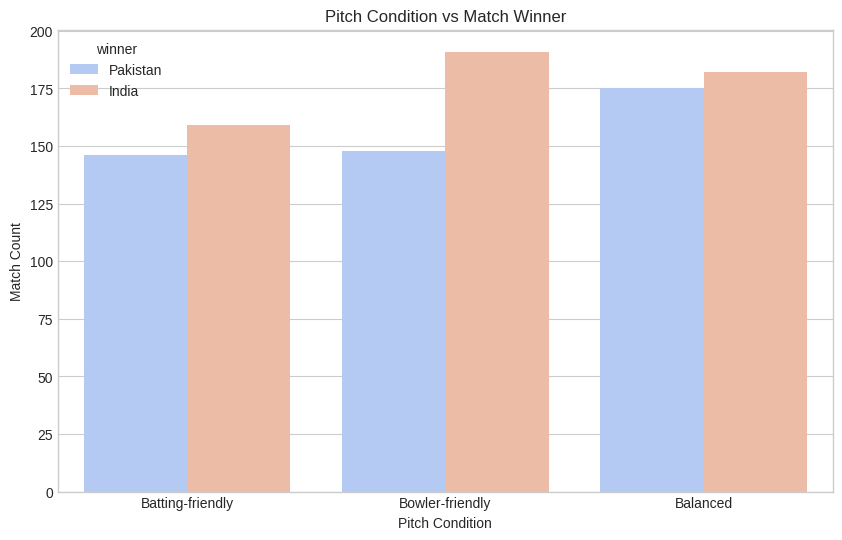

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="pitch_condition", hue="winner", palette="coolwarm")
plt.title("Pitch Condition vs Match Winner")
plt.xlabel("Pitch Condition")
plt.ylabel("Match Count")
plt.show()

## 3.4 Correlation Heatmap for numerical features

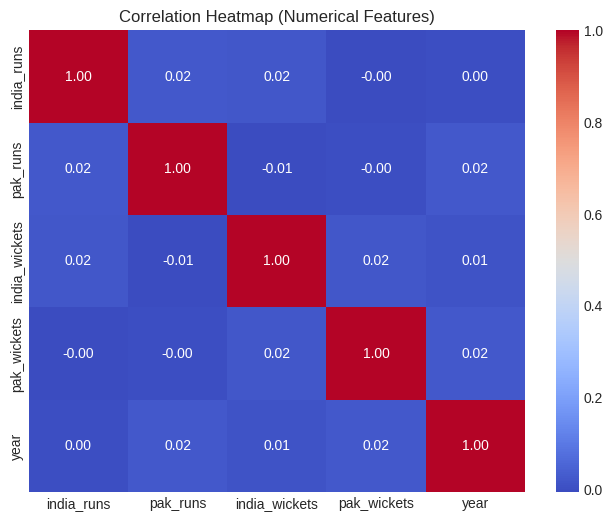

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['india_runs', 'pak_runs', 'india_wickets', 'pak_wickets', 'year']].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

## 3.5  Winner vs Run Difference Heatmap

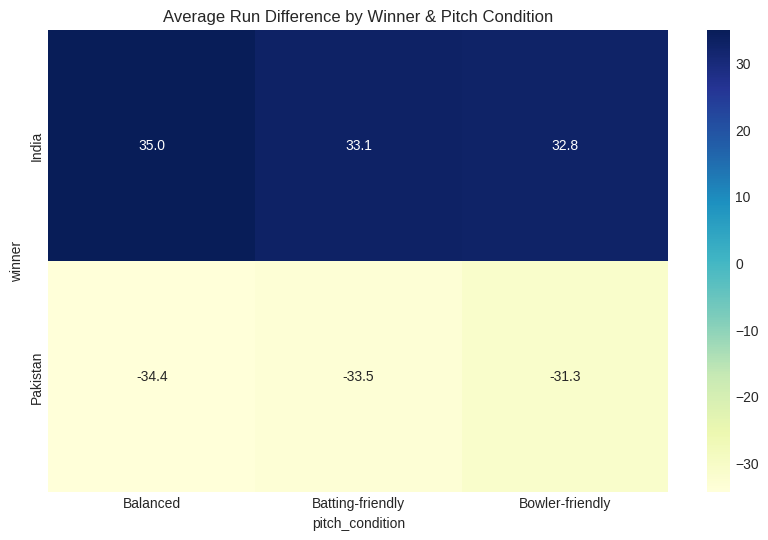

In [21]:
df['run_diff'] = df['india_runs'] - df['pak_runs']

plt.figure(figsize=(10,6))
pivot_table = df.pivot_table(index="winner", columns="pitch_condition", values="run_diff", aggfunc="mean")
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Average Run Difference by Winner & Pitch Condition")
plt.show()

# 4 Feature Engineering

## 4.1 Create new feature: Run Difference

In [22]:
df['run_difference'] = df['india_runs'] - df['pak_runs']

## 4.2 Encode categorical variables

In [23]:
categorical_cols = ['venue', 'tournament', 'toss_winner', 'bat_first', 'winner', 'pitch_condition']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col + "_enc"] = le.fit_transform(df[col])
    label_encoders[col] = le 

In [24]:
features = ['year', 'india_runs', 'pak_runs', 'india_wickets', 'pak_wickets', 
            'run_difference', 'toss_winner_enc', 'bat_first_enc', 
            'venue_enc', 'tournament_enc', 'pitch_condition_enc']

target = 'winner_enc'

X = df[features]
y = df[target]

print("Feature Matrix Shape:", X.shape)
print("Target Distribution:\n", df['winner'].value_counts())

Feature Matrix Shape: (1001, 11)
Target Distribution:
 winner
India       532
Pakistan    469
Name: count, dtype: int64


# Model Creation
## Algorithms: Logistic Regression, Random Forest, XGBoost

### train and split data set 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## LogisticRegression 

In [26]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

## RandomForest Classi

In [27]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

## XGBoost

In [28]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [29]:
models = {
    "Logistic Regression": (y_pred_log, log_reg),
    "Random Forest": (y_pred_rf, rf),
    "XGBoost": (y_pred_xgb, xgb)
}

for name, (y_pred, model) in models.items():
    print(f"\n {name} Results")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


 Logistic Regression Results
Accuracy: 0.9950248756218906
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       107
           1       1.00      0.99      0.99        94

    accuracy                           1.00       201
   macro avg       1.00      0.99      1.00       201
weighted avg       1.00      1.00      1.00       201


 Random Forest Results
Accuracy: 0.9950248756218906
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       107
           1       0.99      1.00      0.99        94

    accuracy                           1.00       201
   macro avg       0.99      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201


 XGBoost Results
Accuracy: 0.9950248756218906
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       107
      

## confusion Matrix 

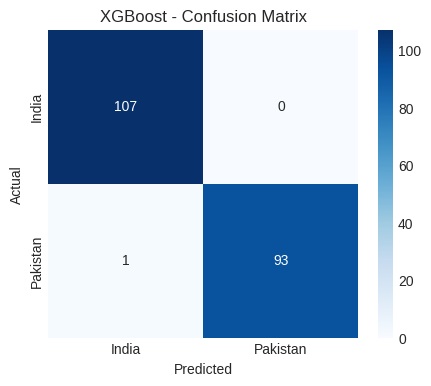

In [30]:
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders['winner'].classes_, yticklabels=label_encoders['winner'].classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

### save the best model, then create a simple prediction function

In [31]:
import joblib

In [32]:
best_model = xgb  
joblib.dump(best_model, "winner_prediction_model.pkl")

# Save label encoders
joblib.dump(label_encoders, "label_encoders.pkl")

print("✅ Model and encoders saved successfully!")

✅ Model and encoders saved successfully!


In [33]:
# Load model & encoders when needed
loaded_model = joblib.load("winner_prediction_model.pkl")
loaded_encoders = joblib.load("label_encoders.pkl")


## Prediction Function

In [34]:
def predict_winner(year, india_runs, pak_runs, india_wickets, pak_wickets, 
                   toss_winner, bat_first, venue, tournament, pitch_condition):
    # Run difference
    run_diff = india_runs - pak_runs
    
    # Encode categorical inputs
    toss_enc = loaded_encoders['toss_winner'].transform([toss_winner])[0]
    bat_first_enc = loaded_encoders['bat_first'].transform([bat_first])[0]
    venue_enc = loaded_encoders['venue'].transform([venue])[0]
    tournament_enc = loaded_encoders['tournament'].transform([tournament])[0]
    pitch_enc = loaded_encoders['pitch_condition'].transform([pitch_condition])[0]
    
    # Create feature array
    features = np.array([[year, india_runs, pak_runs, india_wickets, pak_wickets,
                          run_diff, toss_enc, bat_first_enc, 
                          venue_enc, tournament_enc, pitch_enc]])
    
    # Predict
    pred = loaded_model.predict(features)[0]
    winner = loaded_encoders['winner'].inverse_transform([pred])[0]
    
    return winner


In [35]:
print("🏏 Predicted Winner:", predict_winner(
    year=2024,
    india_runs=120,
    pak_runs=160,
    india_wickets=5,
    pak_wickets=8,
    toss_winner="India",
    bat_first="India",
    venue="New York",
    tournament="WorldCup",
    pitch_condition="Balanced"
))

🏏 Predicted Winner: Pakistan


In [36]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.2 MB/s eta 0:00:00


In [37]:
!pip install gradio

In [38]:
import streamlit as st

In [39]:
st.title("🏏 India vs Pakistan Match Winner Predictor")

# Inputs
year = st.number_input("Year", 2000, 2030, 2023)
india_runs = st.number_input("India Runs", 0, 300, 180)
pak_runs = st.number_input("Pakistan Runs", 0, 300, 160)
india_wickets = st.slider("India Wickets", 0, 10, 5)
pak_wickets = st.slider("Pakistan Wickets", 0, 10, 8)
toss_winner = st.selectbox("Toss Winner", loaded_encoders['toss_winner'].classes_)
bat_first = st.selectbox("Bat First", loaded_encoders['bat_first'].classes_)
venue = st.selectbox("Venue", loaded_encoders['venue'].classes_)
tournament = st.selectbox("Tournament", loaded_encoders['tournament'].classes_)
pitch_condition = st.selectbox("Pitch Condition", loaded_encoders['pitch_condition'].classes_)

if st.button("Predict Winner"):
    winner = predict_winner(year, india_runs, pak_runs, india_wickets, pak_wickets, 
                            toss_winner, bat_first, venue, tournament, pitch_condition)
    st.success(f"🏆 Predicted Winner: {winner}")

2025-09-21 11:05:52.080 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 11:05:52.313 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-21 11:05:52.314 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 11:05:52.315 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 11:05:52.316 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 11:05:52.317 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 11:05:52.318 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 11:05:52.319 Thread 'MainThread': mi

In [40]:
import gradio as gr

In [41]:

def predict_match(model, input_data, encoder=None):
    """
    model       = trained model (XGBoost/RandomForest etc.)
    input_data  = dict with keys like {"year": 2023, "venue": "Delhi", "pitch": "Dry", ...}
    encoder     = encoder used during training (if categorical)
    """
    
    # Convert categorical values using encoder (if available)
    if encoder is not None:
        input_data = encoder.transform([list(input_data.values())])[0]
    else:
        input_data = list(input_data.values())
    
    # Ensure numeric type and correct shape
    features = np.array(input_data, dtype=np.float32).reshape(1, -1)
    
    # Predict
    pred = model.predict(features)[0]
    return "India" if pred == 1 else "Pakistan"

In [42]:
import gradio as gr

with gr.Blocks() as demo:
    with gr.Row():
        india_runs = gr.Number(label="India Runs")
        pak_runs = gr.Number(label="Pakistan Runs")
        india_wkts = gr.Number(label="India Wickets")
        pak_wkts = gr.Number(label="Pakistan Wickets")

    with gr.Row():
        toss_winner = gr.Dropdown(
            choices=list(loaded_encoders['toss_winner'].classes_.astype(str)),
            label="Toss Winner"
        )
        bat_first = gr.Dropdown(
            choices=list(loaded_encoders['bat_first'].classes_.astype(str)),
            label="Bat First"
        )
        venue = gr.Dropdown(
            choices=list(loaded_encoders['venue'].classes_.astype(str)),
            label="Venue"
        )


# ====================================================================================================================================================
# ====================================================================================================================================================

In [43]:
print(df.columns.tolist())

['match_id', 'year', 'venue', 'tournament', 'india_runs', 'pak_runs', 'toss_winner', 'bat_first', 'india_wickets', 'pak_wickets', 'winner', 'pitch_condition', 'run_diff', 'run_difference', 'venue_enc', 'tournament_enc', 'toss_winner_enc', 'bat_first_enc', 'winner_enc', 'pitch_condition_enc']


In [44]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['winner', 'toss_winner', 'pitch_condition']
le_dict = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

## Updated Gradio Inputs

In [45]:
import gradio as gr
import numpy as np

# Single match prediction function
def match_predict(india_runs, pak_runs, toss, pitch):
    # Calculate run difference
    run_diff = india_runs - pak_runs

    # Encode categorical inputs
    toss_enc = le_dict['toss_winner'].transform([toss])[0]
    pitch_enc = le_dict['pitch_condition'].transform([pitch])[0]

    # Prepare features and predict winner
    features = np.array([[india_runs, pak_runs, run_diff, toss_enc, pitch_enc]], dtype=np.float32)
    winner_enc = best_model.predict(features)[0]

    # Decode winner to team name
    winner = le_dict['winner'].inverse_transform([winner_enc])[0]

    # Choose color for winner

    if winner == 0: 
        winner="India" 
    else: 
        winner="PAKISTAN "
    color = "blue" if winner == "India" else "green"
 

    # Return HTML formatted string
    return f"""
    <div style='text-align:center; font-family:Arial;'>
        <h2 style='color:{color};'>🏆 Predicted Winner: {winner}</h2>
        <p style='font-size:18px; color:#FF5733;'>⚡ Run Difference: {run_diff}</p>
    </div>
    """

# Gradio interface
iface = gr.Interface(
    fn=match_predict,
    inputs=[
        gr.Number(label="India Runs", value=0),
        gr.Number(label="Pakistan Runs", value=0),
        gr.Dropdown(choices=list(le_dict['toss_winner'].classes_), label="Toss Winner"),
        gr.Dropdown(choices=list(le_dict['pitch_condition'].classes_), label="Pitch Condition")
    ],
    outputs=gr.HTML(label="Prediction"),  # Use HTML to show colored output
    title="🏏 India vs Pakistan T20 Winner Predictor",
    description="Enter runs, toss winner, and pitch condition to predict the winner.  (0=India,1=Pakistan) in toss "
)

# Launch dashboard (shareable link + inline for Kaggle)
iface.launch(share=True, inline=True)


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://905b40c83c2bac910c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
